## 実行環境

In [1]:
!pip install tensorflow==1.15.0 

     |████████████████████████████████| 412.3MB 39kB/s 
     |████████████████████████████████| 512kB 43.5MB/s 
     |████████████████████████████████| 3.8MB 50.3MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=c2628736d36fb83837caa64261ce2cf8293f0b43863472e397846322c011828d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninsta

In [2]:
!pip install keras==2.2.4 

     |████████████████████████████████| 317kB 19.2MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [3]:
import tensorflow

In [4]:
tensorflow.__version__

'1.15.0'

In [5]:
!pip install kaggle

In [6]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
!mkdir .kaggle

In [8]:
!ls -a

.  ..  .config	drive  .kaggle	sample_data


## データのロード

In [9]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"takahiroterui","key":"e94ff9b096769893dfc34cc523d964ee"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [10]:
!chmod 600 /content/.kaggle/kaggle.json

In [11]:
!pwd

/content


In [12]:
!ls -a .kaggle

.  ..  kaggle.json


In [14]:
!mkdir /root/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [15]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [16]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [17]:
!cat /root/.kaggle/kaggle.json

{"username": "takahiroterui", "key": "e94ff9b096769893dfc34cc523d964ee"}

In [18]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        104           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        211           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        499           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3436           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      27706            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       7102            True  
connectx

In [19]:
! mkdir TGS_Salt_dateset

In [20]:
cd TGS_Salt_dateset

/content/TGS_Salt_dateset


In [21]:
# kaggle の SaltDataset を DL

!kaggle competitions download -c tgs-salt-identification-challenge --force

 96% 156M/163M [00:01<00:00, 98.3MB/s]
100% 163M/163M [00:01<00:00, 92.0MB/s]
 90% 195M/217M [00:01<00:00, 176MB/s]
100% 217M/217M [00:01<00:00, 148MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 82.3MB/s]
  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 83.3MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 216MB/s]
 94% 39.0M/41.4M [00:00<00:00, 93.5MB/s]
100% 41.4M/41.4M [00:00<00:00, 105MB/s] 
 66% 25.0M/37.9M [00:00<00:00, 77.5MB/s]
100% 37.9M/37.9M [00:00<00:00, 150MB/s] 


In [55]:
!unzip /content/drive/MyDrive/TGS_Salt_dateset/competition_data.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: __MACOSX/competition_data/train/masks/._7e68df3981.png  
  inflating: competition_data/train/masks/851a37ac37.png  
  inflating: __MACOSX/competition_data/train/masks/._851a37ac37.png  
  inflating: competition_data/train/masks/6010b9b84d.png  
  inflating: __MACOSX/competition_data/train/masks/._6010b9b84d.png  
  inflating: competition_data/train/masks/f64190c47e.png  
  inflating: __MACOSX/competition_data/train/masks/._f64190c47e.png  
  inflating: competition_data/train/masks/ec3130dd0b.png  
  inflating: __MACOSX/competition_data/train/masks/._ec3130dd0b.png  
  inflating: competition_data/train/masks/894b9ae774.png  
  inflating: __MACOSX/competition_data/train/masks/._894b9ae774.png  
  inflating: competition_data/train/masks/6a57dfd211.png  
  inflating: __MACOSX/competition_data/train/masks/._6a57dfd211.png  
  inflating: competition_data/train/masks/9b656c339a.png  
  inflating: __MACOSX/competition_data/train/masks/._9b656c339a.p

In [56]:
!unzip /content/drive/MyDrive/TGS_Salt_dateset/flamingo.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: train/masks/9678fb935e.png  
  inflating: __MACOSX/train/masks/._9678fb935e.png  
  inflating: train/masks/2b723b8474.png  
  inflating: __MACOSX/train/masks/._2b723b8474.png  
  inflating: train/masks/7e68df3981.png  
  inflating: __MACOSX/train/masks/._7e68df3981.png  
  inflating: train/masks/851a37ac37.png  
  inflating: __MACOSX/train/masks/._851a37ac37.png  
  inflating: train/masks/6010b9b84d.png  
  inflating: __MACOSX/train/masks/._6010b9b84d.png  
  inflating: train/masks/f64190c47e.png  
  inflating: __MACOSX/train/masks/._f64190c47e.png  
  inflating: train/masks/ec3130dd0b.png  
  inflating: __MACOSX/train/masks/._ec3130dd0b.png  
  inflating: train/masks/894b9ae774.png  
  inflating: __MACOSX/train/masks/._894b9ae774.png  
  inflating: train/masks/6a57dfd211.png  
  inflating: __MACOSX/train/masks/._6a57dfd211.png  
  inflating: train/masks/9b656c339a.png  
  inflating: __MACOSX/train/masks/._9b656c339a.png  
  inflating: train

In [57]:
!unzip /content/drive/MyDrive/TGS_Salt_dateset/test.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: images/a3df74dd31.png   
  inflating: images/187ecc32d5.png   
  inflating: images/54538419f5.png   
  inflating: images/93614d4b95.png   
  inflating: images/50a91adce8.png   
  inflating: images/97d23cea10.png   
  inflating: images/ca04c19c0b.png   
  inflating: images/d168218bac.png   
  inflating: images/a670e833a4.png   
  inflating: images/a964a0f499.png   
  inflating: images/371bf59030.png   
  inflating: images/fc74f77bae.png   
  inflating: images/f63dc1e3be.png   
  inflating: images/b807539a5f.png   
  inflating: images/1dfcbf4bca.png   
  inflating: images/a971d2ae53.png   
  inflating: images/4ad823e2d3.png   
  inflating: images/85a9687a4f.png   
  inflating: images/da5b430ecd.png   
  inflating: images/b1a2903d1c.png   
  inflating: images/70958cacd4.png   
  inflating: images/2093e5c98e.png   
  inflating: images/f2c108fd0b.png   
  inflating: images/56b0d83562.png   
  inflating: images/09aa9bde24.png   
  inflating: image

In [58]:
!unzip /content/drive/MyDrive/TGS_Salt_dateset/train.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: images/d80ead8703.png   
  inflating: images/b012e9ebb0.png   
  inflating: images/d3034e7a60.png   
  inflating: images/ae2ef70d51.png   
  inflating: images/1af44a9db0.png   
  inflating: images/41cfd4b320.png   
  inflating: images/853e89d0d3.png   
  inflating: images/2a484baa26.png   
  inflating: images/92e617896e.png   
  inflating: images/b70f0ab0c2.png   
  inflating: images/e8757626a1.png   
  inflating: images/6a3d92ce59.png   
  inflating: images/127ef4105f.png   
  inflating: images/d21012f5c1.png   
  inflating: images/1cb9549d2c.png   
  inflating: images/e030bdae65.png   
  inflating: images/0cf7155eb6.png   
  inflating: images/badb3ea766.png   
  inflating: images/9bd58061d6.png   
  inflating: images/2b1e71c2a3.png   
  inflating: images/28d42de29f.png   
  inflating: images/10833853b3.png   
  inflating: images/ef13247eed.png   
  inflating: images/bce104494c.png   
  inflating: images/c8ce151a18.png   
  inflating: image

## Git Clone

In [60]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [63]:
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 12.10 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Checking out files: 100% (253/253), done.


In [23]:
cd /content/drive/MyDrive/unet

/content/drive/MyDrive/unet


In [29]:
mkdir data/salt/

In [28]:
# saltのデータを unet 内にmoveする

!mv /content/drive/MyDrive/TGS_Salt_dateset/train /content/drive/MyDrive/unet/data/salt/

In [32]:
!mv /content/drive/MyDrive/TGS_Salt_dateset/competition_data/test/images /content/drive/MyDrive/unet/data/salt

In [35]:
# フォルダ名書きかえ

import os

oldpath = '/content/drive/MyDrive/unet/data/salt/images'
newpath = '/content/drive/MyDrive/unet/data/salt/test'
os.rename(oldpath, newpath)

In [ ]:
# main.py の書き換え

In [48]:
os.getcwd()

'/content/drive/MyDrive/unet'

In [49]:
os.chdir("/content/drive/MyDrive/unet/data/salt/test")

In [50]:
os.getcwd()

'/content/drive/My Drive/unet/data/salt/test'

In [51]:
# test のファイル名の書きかえ

import glob
import os

files = glob.glob("*.png")

for i, old_name in enumerate(files):
    # ファイル名の決定
    #new_name = "新しい名前_{0:03d}.jpg".format(i + 1)
    new_name = "{}.png".format(i)

    # ファイル名の変更
    os.rename(old_name, new_name)

    # 変更の表示
    print(old_name + " → " + new_name)


ストリーミング出力は最後の 5000 行に切り捨てられました。
640c607028.png → 13000.png
18bcca2e96.png → 13001.png
ec19326bbe.png → 13002.png
36951bc157.png → 13003.png
411c393de0.png → 13004.png
7a47875a7b.png → 13005.png
ac50e41f8a.png → 13006.png
e41b2925a7.png → 13007.png
0893024db8.png → 13008.png
d77eb315ac.png → 13009.png
af26a47641.png → 13010.png
caab8d8513.png → 13011.png
a2b82c3cf3.png → 13012.png
25a0f0fd27.png → 13013.png
af1d588df1.png → 13014.png
ab8f26de28.png → 13015.png
ff182734dc.png → 13016.png
e7489b0c3c.png → 13017.png
b5b511dc06.png → 13018.png
593f3e9254.png → 13019.png
ffa64b0acf.png → 13020.png
c9f84c908b.png → 13021.png
46d4cce6b7.png → 13022.png
d5b1a635a9.png → 13023.png
7ce692067e.png → 13024.png
19edb31599.png → 13025.png
f5d9f8e9b0.png → 13026.png
e16fb83895.png → 13027.png
739a2484b4.png → 13028.png
77f0e55398.png → 13029.png
48b79d6237.png → 13030.png
b5a52c35fc.png → 13031.png
436aaf7e67.png → 13032.png
436d01f71f.png → 13033.png
5084c38739.png → 13034.png
76d317386a.png → 13035.

In [53]:
os.chdir("/content/drive/MyDrive/unet")

In [54]:
os.getcwd()

'/content/drive/My Drive/unet'

In [57]:
run main.py

/content/drive/My Drive/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/1
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
150/150 [==============================] - 2149s 14s/step - loss: 0.6061 - acc: 0.7419

Epoch 00001: loss improved from inf to 0.60605, saving model to unet_salt.hdf5
30/30 [==============================] - 58s 2s/step


/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/3_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/4_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/5_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%

In [ ]:
# trainsizeの取得

In [74]:
import cv2
import matplotlib.pyplot as plt

In [77]:
# train画像のサイズ
image01 = cv2.imread("/content/drive/MyDrive/unet/data/salt/train/images/0061281eea.png")
image01.shape

(101, 101, 3)

In [78]:
# mask画像のサイズ
image02 = cv2.imread("/content/drive/MyDrive/unet/data/salt/train/masks/0061281eea.png")
image02.shape

(101, 101, 3)

In [79]:
# test画像のサイズ
image03 = cv2.imread("/content/drive/MyDrive/unet/data/salt/test/5.png")
image03.shape

(101, 101, 3)

In [80]:
image01.max()

255

In [81]:
image01.min()

0

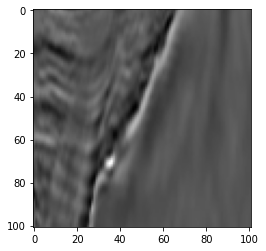

In [82]:
plt.imshow(image01)

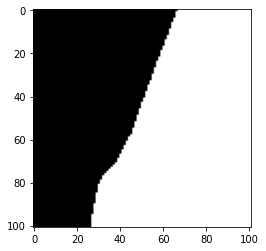

In [83]:
plt.imshow(image02)

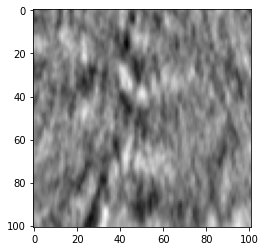

In [84]:
plt.imshow(image03)

In [88]:
run main.py

/content/drive/My Drive/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/1
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
100/100 [==============================] - 1821s 18s/step - loss: 0.6448 - acc: 0.7450

Epoch 00001: loss improved from inf to 0.64476, saving model to unet_salt.hdf5
30/30 [==============================] - 77s 3s/step


/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/0_predict.png is a low contrast image
  
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/1_predict.png is a low contrast image
  
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/2_predict.png is a low contrast image
  
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/3_predict.png is a low contrast image
  
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/4_predict.png is a low contrast image
  
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/5_predict.png is a low contrast image
  
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/6_predict.png is a low contrast image
  
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/7_predict.png is a low contrast image
  
/content/drive/My Drive/unet/data.py:124: UserWarning: data/salt/test/8_predict.png is a low contrast image
  
/

<Figure size 432x288 with 0 Axes>

In [90]:
# test画像のサイズ
image04 = cv2.imread("/content/drive/MyDrive/unet/data/salt/test/0_predict.png")
image04.shape

(256, 256, 3)

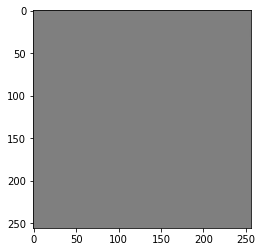

In [91]:
plt.imshow(image04)

## 【問題2】コードリーディング

### 『U-Net: Convolutional Networks for Biomedical Image Segmentation』
* どんなもの？
  + CNNは１画像につき１クラスだが、生物医学の画像などでは１画像中のピクセル単位でクラスラベルを付与したい

* 議論はある？
  + 先行研究では位置精度・速度に問題があった

* どうやって有効だと検証した？
  +  ISBI cell tracking challenge 2015の PhC-U373 データセットで IoU 92%

* 先行研究と比べて何がすごい？
  + FC層を排除
  + 位置情報の精度が良い
  + 柔軟なデータ拡張によって少ないデータでも学習できる

* 技術の手法や肝は？
  + アップサンプリング時にエンコーダー側の特徴マップをデコーダー側とチャネル方向に結合
　


### コード

* data.py の trainGenerator 内の ImageDataGenerator(kerasのメソッド) に aug_dict を渡すことで、データの拡張を行なっている

* model.py の unet() で、アップサンプリングの際に、conv と up を axis=3 で concatenate している

